In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cmaps
from matplotlib.colors import LogNorm

def worldmap_norm(data, vmin=1e-30):
    projection = ccrs.PlateCarree(central_longitude=0)
    img_extent = (-180, 180, -90, 90)
    
    print(f"min {data.min()} max {data.max()}")
    log_norm = LogNorm(vmin=vmin, vmax=data.max())
    #log_norm_data = log_norm(data, clip=True)

    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    im = ax.imshow(data,
                   origin='upper',
                   extent=img_extent,
                   transform=projection,
                   cmap='GnBu',
                   norm=log_norm)
    fig.colorbar(im, ax=ax, orientation='horizontal')

def load(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    h08dir = '/home/kajiyama/H08/H08_20230612/'
    file = h08dir + name
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # conversion second to year
    adm = lonlat*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

def load_times_area(name, SUF='.hlf', day=356, second=86400, coef=1e12):
    if SUF == '.hlf':
        shape = (360, 720)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.WFDEI.hlf'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.WFDEI.hlf'
    elif SUF == '.gl5':
        shape = (2160, 4320)
        areapath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_ara_/lndara.CAMA.gl5'
        maskpath = '/home/kajiyama/H08/H08_20230612/map/dat/lnd_msk_/lndmsk.CAMA.gl5'
    dtype = 'float32' # 4バイト
    h08dir = '/home/kajiyama/H08/H08_20230612/'
    file = h08dir + name
    
    # area
    area = np.fromfile(areapath, dtype=dtype)
    area = area.reshape(shape)
    
    # data
    data = np.fromfile(file, dtype=dtype)
    lonlat = data.reshape(shape)
    
    # mask out
    mask = np.fromfile(maskpath, dtype=dtype)
    mask = mask.reshape(shape)
    lonlat = np.ma.masked_where(mask==0, lonlat)
    lonlat = np.ma.masked_where(lonlat>1e19, lonlat)
    
    # multiply area
    adm = lonlat*area
    
    # conversion from mm/s to mm/year
    adm = adm*day*second
    
    # conversion from kg to mm3
    # 1000kg = 1m3 = 1e9mm3
    # km3 = kg/1e12
    adm = adm/coef
    
    # sum up
    total = np.sum(adm)
    print(f"total {total} km3/year")
    
    return adm

total 102994.80661481882 km3/year
min 1.4923584312200547e-10 max 0.6995761776
total 114849.37962407338 km3/year
min 0.0 max 25.5496025088


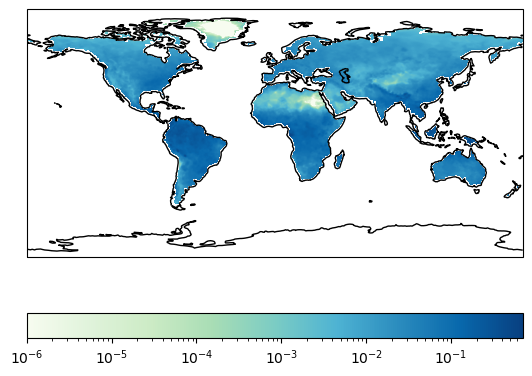

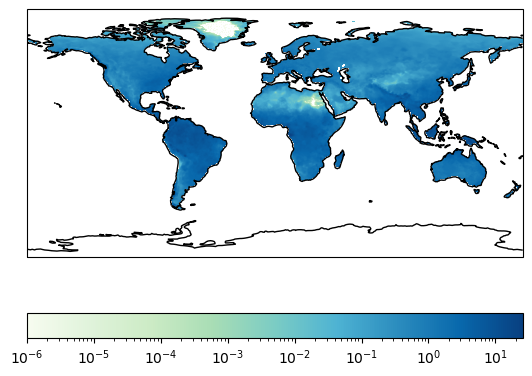

In [4]:
image = load_times_area(name='met/dat/Rainf___/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='met/dat/Rainf___/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 11110.215667948687 km3/year
min 1.35652020201087e-10 max 0.1427409756
total 11828.95322205598 km3/year
min 0.0 max 5.3441586432


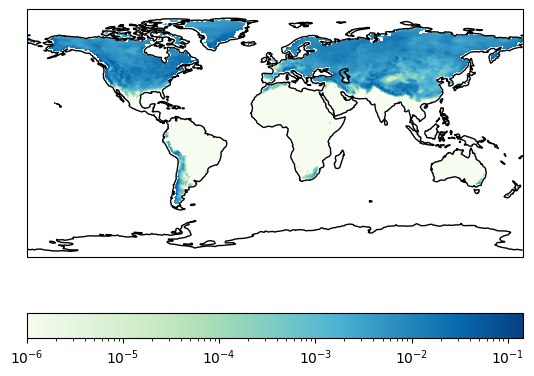

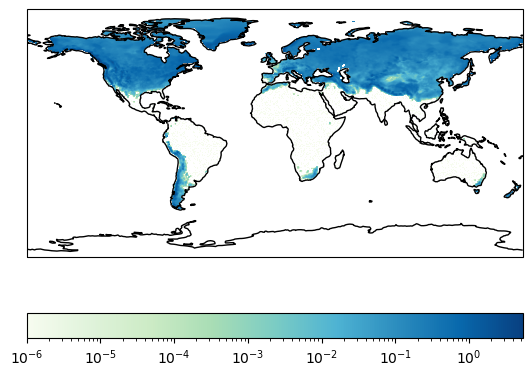

In [5]:
image = load_times_area(name='met/dat/Snowf___/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='met/dat/Snowf___/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 392912178073412.4 km3/year
min 27419845.922390018 max 265920146.1988098
total 422675175611790.6 km3/year
min 971012267.3375281 max 9572104222.299862


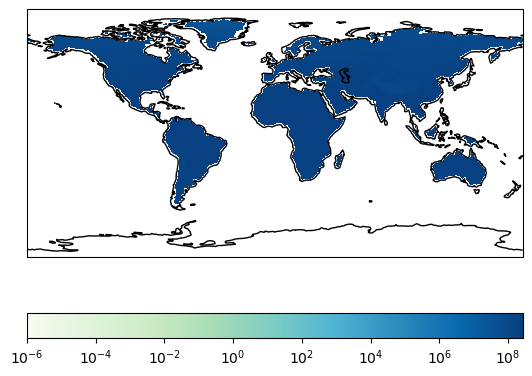

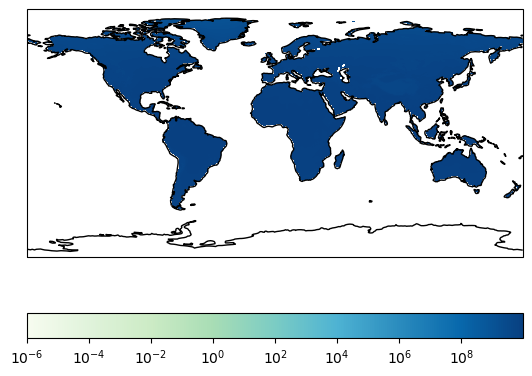

In [11]:
image = load_times_area(name='met/dat/PSurf___/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='met/dat/PSurf___/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 222.95151525484613 km3/year
min 1.45333142578125e-05 max 0.0003532166578125
total 6.822384376746974 km3/year
min 1.425309169921875e-05 max 0.0003564972421875
216


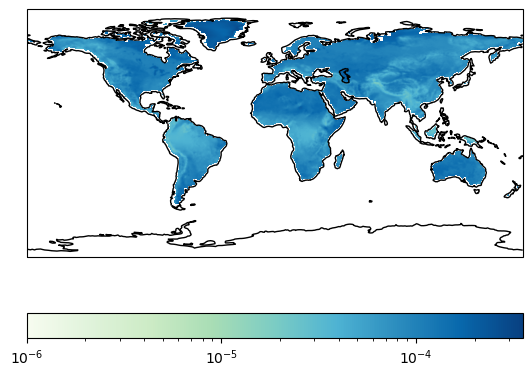

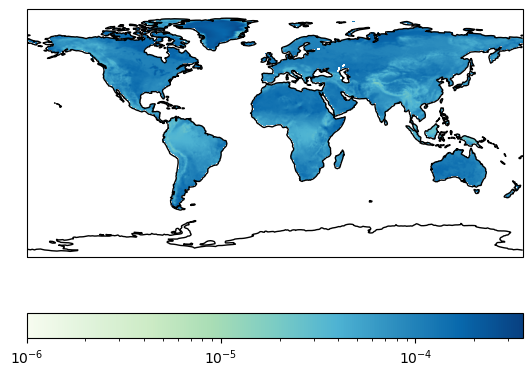

In [9]:
image = load(name='met/dat/Wind____/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load(name='met/dat/Wind____/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)
print(6*36)

total 1348263806175.114 km3/year
min 54493.4071369728 max 1161278.5288937471
total 1451694152775.6184 km3/year
min 1949079.7611122688 max 42194694.91140035


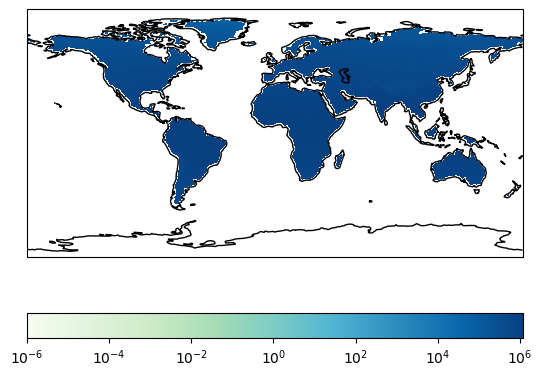

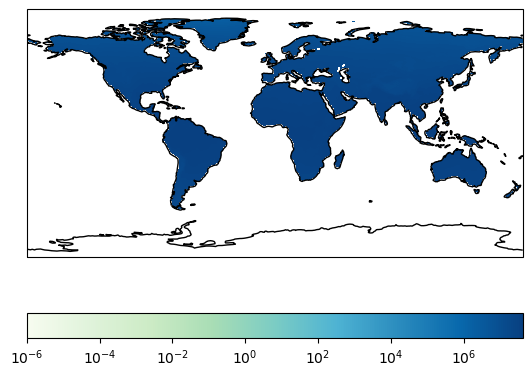

In [18]:
image = load_times_area(name='met/dat/LWdown__/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='met/dat/LWdown__/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 800902015447.55 km3/year
min 26033.123229696 max 749826.4265883648
total 855506563816.9707 km3/year
min 871339.3359814656 max 27061534.195502285


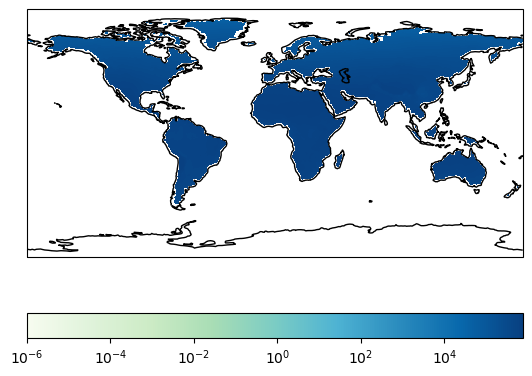

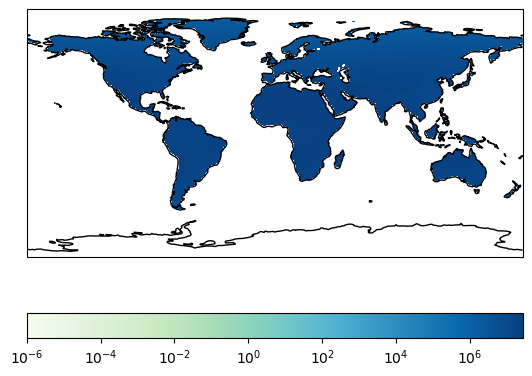

In [19]:
image = load_times_area(name='met/dat/SWdown__/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='met/dat/SWdown__/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 0.49079080673511055 km3/year
min 1.761610722541809e-08 max 6.885630752563477e-07
total 0.01492147872606239 km3/year
min 1.758384861946106e-08 max 6.968580688476562e-07
0.5364


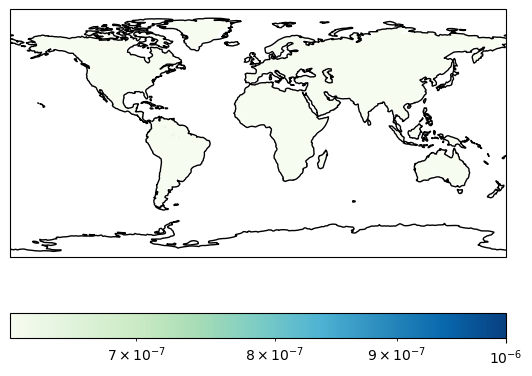

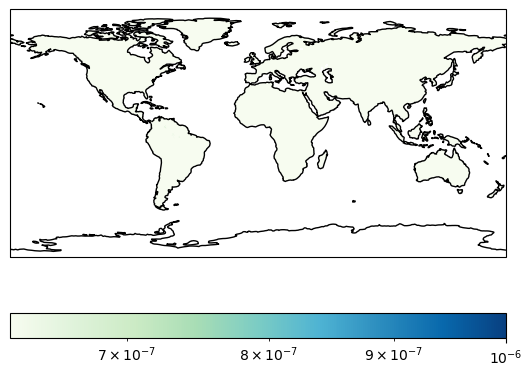

In [21]:
image = load(name='met/dat/Qair____/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load(name='met/dat/Qair____/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

print(0.0149*36)

total 19513.577606699495 km3/year
min 0.007595328825 max 0.009355149
total 583.5159521511752 km3/year
min 0.00759446415 max 0.00935528265
20988


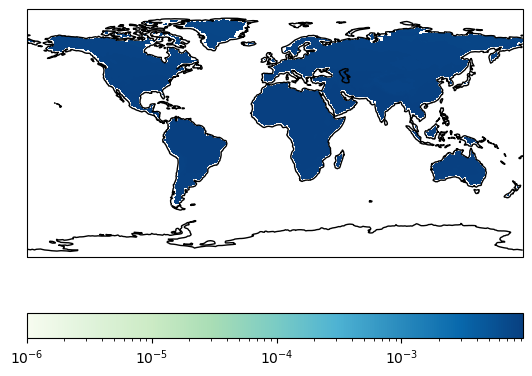

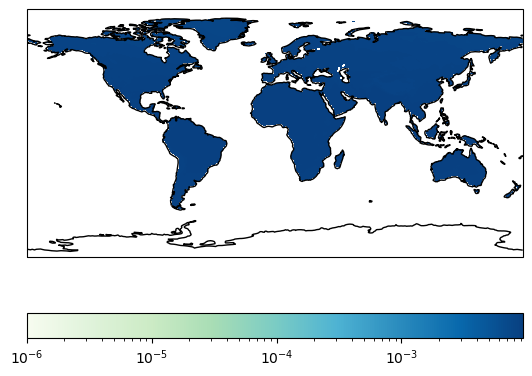

In [23]:
image = load(name='met/dat/Tair____/W5E5____20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load(name='met/dat/Tair____/W5E5____20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)
print(583*36)

In [ ]:
image = load_times_area(name='lnd/out/SWnet___/W5E5LR__20190000.gl5', SUF='.gl5')
worldmap_norm(image, vmin=1e-6)

image = load_times_area(name='lnd/out/SWnet___/W5E5LR__20190000.hlf', SUF='.hlf')
worldmap_norm(image, vmin=1e-6)

total 638336807422.951 km3/year
min 13801.3776543744 max 702128.301539328
total 689408740846.3812 km3/year
min 474082.9176397824 max 25418850.294457957
